**References**:


*   Computing Platforms: Set up the Workspace for Machine Learning Projects.  https://ms.pubpub.org/pub/computing
*  Machine Learning for Predictions. https://ms.pubpub.org/pub/ml-prediction
* Machine Learning Packages: https://scikit-learn.org/stable/



# Import and Inspect Data

## import packages

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
plt.style.use('classic')
random.seed(42)

## import train and test data for Classification

In [3]:

C_train = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/Jiayi-Wang-FinalProject/main/data/Processed_Data/Classification_Train.csv", index_col="Unnamed: 0")
C_test = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/Jiayi-Wang-FinalProject/main/data/Processed_Data/Classification_Test.csv",index_col="Unnamed: 0")

In [4]:
C_train.isna().sum()

Positive          0
ROI_past_ma10    11
dtype: int64

## Drop nan for classification Data

In [5]:
C_train =C_train.dropna()

In [6]:
C_train.head()

,Positive,ROI_past_ma10
11,1,0.002341
12,1,0.002241
13,1,0.002548
14,0,0.002623
15,0,0.002037


In [7]:
C_test.isna().sum()

Positive         0
ROI_past_ma10    0
dtype: int64

## import train and test data for Regression

In [8]:

R_train = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/Jiayi-Wang-FinalProject/main/data/Processed_Data/Regression_Train.csv", index_col="Unnamed: 0")
R_test = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/Jiayi-Wang-FinalProject/main/data/Processed_Data/Regression_Test.csv",index_col="Unnamed: 0")

## drop nan for Regression Data

In [9]:
R_train.isna().sum()

ROI               1
ROI_past_ma10    11
dtype: int64

In [10]:
R_train=R_train.dropna()

In [11]:
R_test.isna().sum()

ROI              0
ROI_past_ma10    0
dtype: int64

In [12]:
R_train.head()

,ROI,ROI_past_ma10
11,0.001244,0.002341
12,0.005921,0.002241
13,0.003523,0.002548
14,-0.005580,0.002623
15,-0.031181,0.002037


In [13]:
R_test.head()

,ROI,ROI_past_ma10
1498,0.002725,0.002760
1499,0.009496,0.002819
1500,-0.000081,0.002885
1501,-0.007707,0.001951
1502,-0.000413,0.001761


# Machine Learning Classifier

references:


*   classification report: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

*   confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


*   ROC AUC: 
 * https://developers.google.com/machine-learning/crash-course/classification/check-your-understanding-roc-and-auc
 * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
  * https://youtu.be/4jRBRDbJemM





## Define the Train and Test (X,y)


In [14]:
C_train.head()

,Positive,ROI_past_ma10
11,1,0.002341
12,1,0.002241
13,1,0.002548
14,0,0.002623
15,0,0.002037


In [15]:
X_train = pd.DataFrame(np.array(C_train['ROI_past_ma10']).astype(float).reshape(-1,1))
y_train = pd.DataFrame(C_train['Positive'].astype(int))

In [16]:
C_test.head()

,Positive,ROI_past_ma10
1498,1,0.002760
1499,1,0.002819
1500,0,0.002885
1501,0,0.001951
1502,0,0.001761


In [17]:
X_test = pd.DataFrame(np.array(C_test['ROI_past_ma10']).astype(float).reshape(-1,1))
y_test = pd.DataFrame(C_test['Positive'].astype(int))

## Import base packages

In [18]:
from sklearn.base import BaseEstimator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

## Decision Tree Classifer

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Model

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
mdl = DecisionTreeClassifier().fit(X_train, y_train)

## Result

In [21]:
y_pred= mdl.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Evaluations

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.51      0.48       354
           1       0.50      0.45      0.47       395

    accuracy                           0.47       749
   macro avg       0.48      0.48      0.47       749
weighted avg       0.48      0.47      0.47       749



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


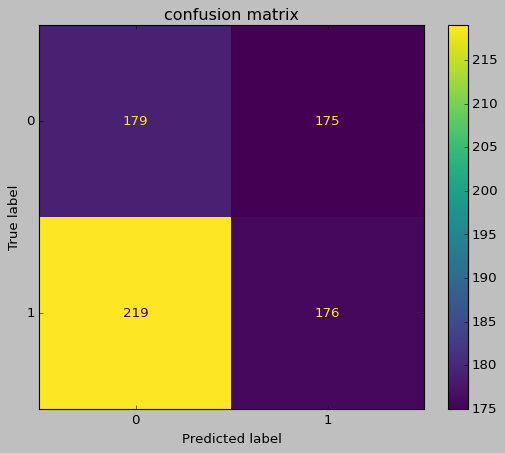

In [23]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


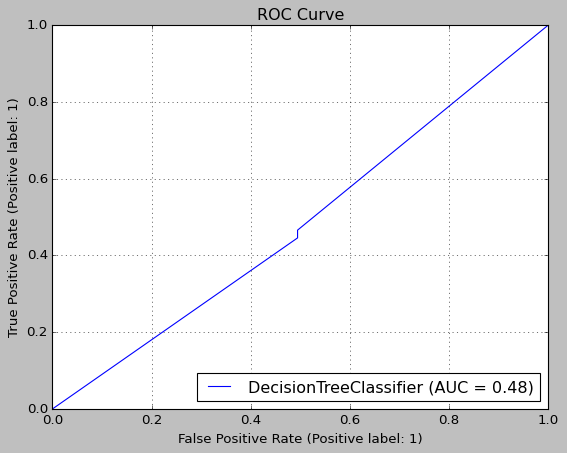

In [24]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

## Random Forest Classifier

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
mdl = RandomForestClassifier().fit(X_train, y_train)

<ipython-input-26-037da15b76a8>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestClassifier().fit(X_train, y_train)


In [27]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.46      0.51      0.48       354
           1       0.51      0.46      0.48       395

    accuracy                           0.48       749
   macro avg       0.48      0.48      0.48       749
weighted avg       0.48      0.48      0.48       749



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


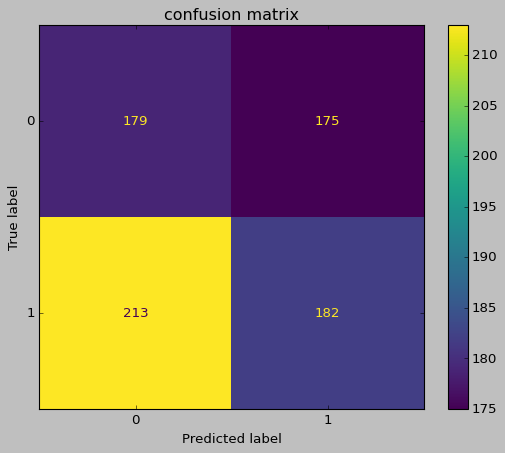

In [28]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


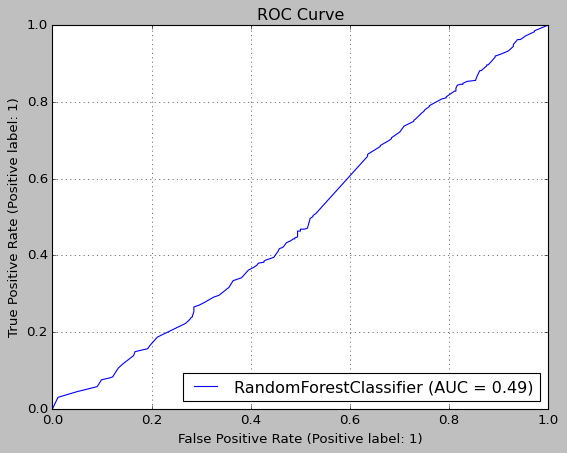

In [29]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

## Multi-Layer Classifier

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [30]:
from sklearn.neural_network import MLPClassifier

In [31]:
mdl = MLPClassifier(hidden_layer_sizes=256).fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       354
           1       0.53      1.00      0.69       395

    accuracy                           0.53       749
   macro avg       0.26      0.50      0.35       749
weighted avg       0.28      0.53      0.36       749



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


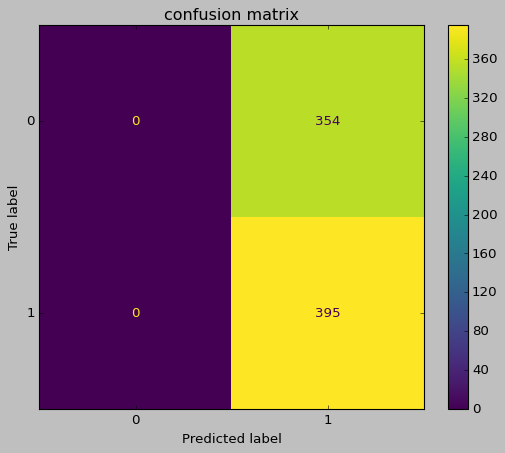

In [33]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

## Auto-ML Classifier

reference:

https://auto.gluon.ai/stable/index.html

notes: 
* please first install the pacakge and restart run time 
* change runtime type to GPU can accelerate the speed
* after you restart the runtime, please mute the code box for package installation



In [34]:
!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49 kB 533 kB/s 
     |████████████████████████████████| 279 kB 27.1 MB/s 
     |████████████████████████████████| 285 kB 56.6 MB/s 
     |████████████████████████████████| 101 kB 1.3 MB/s 
     |████████████████████████████████| 59 kB 5.3 MB/s 
     |████████████████████████████████| 62 kB 305 kB/s 
     |████████████████████████████████| 224 kB 59.3 MB/s 
     |████████████████████████████████| 41 kB 572 kB/s 
     |████████████████████████████████| 1.0 MB 37.4 MB/s 
     |████████████████████████████████| 132 kB 76.8 MB/s 
     |████████████████████████████████| 802 kB 58.5 MB/s 
     |████████████████████████████████| 1.6 MB 62.0 MB/s 
     |████████████████████████████████| 60.2 MB 1.2 MB/s 
     |████████████████████████████████| 280 kB 61.5 MB/s 
     |████████████████████████████████| 69 kB 9.8 MB/s 
     |████████████████████████████████| 49

In [35]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [36]:
train_google = pd.DataFrame(X_train)
train_google['target'] = y_train.values

test_google = pd.DataFrame(X_test)
test_google['target'] = y_test.values

In [37]:
train_data = TabularDataset(train_google)
test_data = TabularDataset(test_google)

In [38]:
predictor = TabularPredictor(
    path='AutogluonModels/classifier',
    label='target'
).fit(train_data)

# predictor = TabularPredictor.load("AutogluonModels/classifier/")

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/classifier/"
AutoGluon Version:  0.6.0
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    1487
Train Data Columns: 1
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12271.58 MB
	Train Data (Original)  Memory Usage: 0.01 MB (0.0% of available memory)
	Inferring data type of each feature base

In [39]:
predictor = TabularPredictor.load("AutogluonModels/classifier/")

In [40]:
# reference: https://auto.gluon.ai/stable/cheatsheet.html
predictor.leaderboard(silent=True, data=test_data,extra_metrics=['accuracy','precision','recall','acc','f1'])

,model,score_test,accuracy,precision,recall,f1,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetTorch,0.527370,0.527370,0.527370,1.000000,0.690559,0.530201,0.036404,0.007577,2.396461,0.036404,0.007577,2.396461,1,True,12
1,LightGBMXT,0.522029,0.522029,0.527086,0.911392,0.667904,0.546980,0.004779,0.003609,2.484492,0.004779,0.003609,2.484492,1,True,3
2,CatBoost,0.522029,0.522029,0.533095,0.754430,0.624738,0.577181,0.012599,0.011972,2.515941,0.012599,0.011972,2.515941,1,True,7
3,WeightedEnsemble_L2,0.518024,0.518024,0.530035,0.759494,0.624350,0.583893,0.092798,0.053521,6.339414,0.009090,0.001535,1.134242,2,True,14
4,LightGBMLarge,0.515354,0.515354,0.524024,0.883544,0.657870,0.540268,0.051488,0.004050,0.735869,0.051488,0.004050,0.735869,1,True,13
5,LightGBM,0.511348,0.511348,0.524046,0.800000,0.633267,0.553691,0.004182,0.003266,0.872854,0.004182,0.003266,0.872854,1,True,4
6,RandomForestEntr,0.508678,0.508678,0.530067,0.602532,0.563981,0.493289,0.203945,0.149616,3.214607,0.203945,0.149616,3.214607,1,True,6
7,RandomForestGini,0.508678,0.508678,0.530067,0.602532,0.563981,0.493289,0.296210,0.095205,1.485416,0.296210,0.095205,1.485416,1,True,5
8,NeuralNetFastAI,0.503338,0.503338,0.524946,0.612658,0.565421,0.550336,0.034697,0.019166,5.558524,0.034697,0.019166,5.558524,1,True,10
9,ExtraTreesEntr,0.502003,0.502003,0.523810,0.612658,0.564761,0.513423,0.177556,0.102008,2.040081,0.177556,0.102008,2.040081,1,True,9


# Machine Learning Regression

## important global packages

In [41]:
from sklearn.metrics import r2_score

## Define the Train and Test (X, y)

In [42]:
R_train.head()

,ROI,ROI_past_ma10
11,0.001244,0.002341
12,0.005921,0.002241
13,0.003523,0.002548
14,-0.005580,0.002623
15,-0.031181,0.002037


In [43]:
X_train = pd.DataFrame(R_train['ROI_past_ma10'])
y_train = pd.DataFrame(R_train['ROI'])

In [44]:
R_test.head()

,ROI,ROI_past_ma10
1498,0.002725,0.002760
1499,0.009496,0.002819
1500,-0.000081,0.002885
1501,-0.007707,0.001951
1502,-0.000413,0.001761


In [45]:
X_test = pd.DataFrame(R_test['ROI_past_ma10'])
y_test = pd.DataFrame(R_test['ROI'])

## Linear Regression

In [46]:
from sklearn import linear_model

In [47]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)

In [48]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -0.0031790908454567557


In [49]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,-0.000040
1,-0.000055
2,-0.000071
3,0.000161
4,0.000209
...,...
744,0.001002
745,0.001178
746,0.001318
747,0.001148


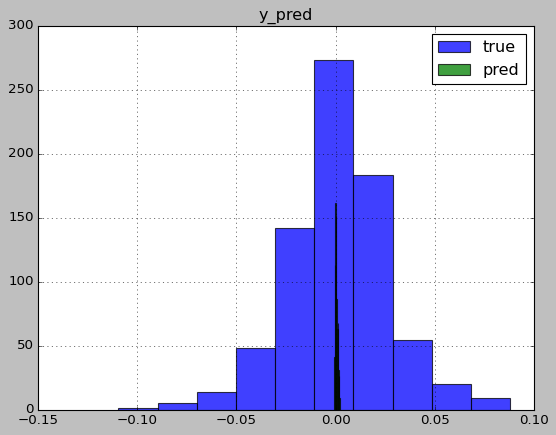

In [50]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Random Forest Regression

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
mdl = RandomForestRegressor().fit(X_train, y_train)

<ipython-input-52-d958d3892696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


In [53]:
# calculate R2
from sklearn.metrics import r2_score

In [54]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -0.21087372347131317


In [55]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,0.017704
1,0.006023
2,-0.000212
3,0.005980
4,-0.017864
...,...
744,-0.000720
745,-0.032065
746,-0.012065
747,0.010181


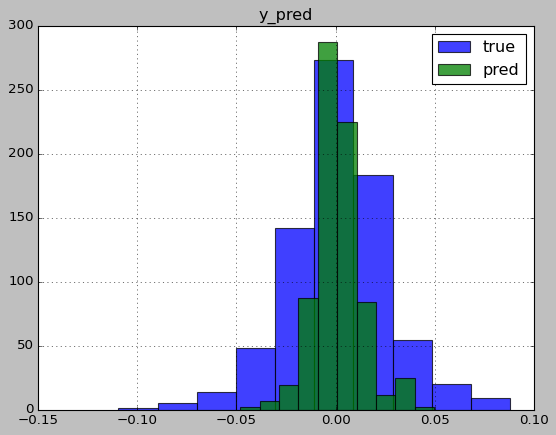

In [56]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Auto-ML

In [57]:
train_google = pd.DataFrame(X_train)
train_google['target'] = y_train.values

test_google = pd.DataFrame(X_test)
test_google['target'] = y_test.values

In [58]:
train_data = TabularDataset(train_google)
test_data = TabularDataset(test_google)

In [59]:
predictor = TabularPredictor(
    path='AutogluonModels/regression/',
    label='target'
).fit(train_data)

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/regression/"
AutoGluon Version:  0.6.0
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    1487
Train Data Columns: 1
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1868023409669209, -0.0788775082783444, 0.00054, 0.01875)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12542.61 MB
	Train Data (Original)  Memory Usage: 0.01 MB (0.0% of available memor

In [60]:
predictor = TabularPredictor.load("AutogluonModels/regression/")

In [61]:
# reference: https://auto.gluon.ai/stable/cheatsheet.html
# https://auto.gluon.ai/0.3.1/api/autogluon.tabular.models.html
predictor.leaderboard(silent=True, data=test_data, extra_metrics=["root_mean_squared_error", "mean_squared_error", "mean_absolute_error", "median_absolute_error", "r2"])

,model,score_test,root_mean_squared_error,mean_squared_error,mean_absolute_error,median_absolute_error,r2,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM,-0.025292,-0.025292,-0.000640,-0.018711,-0.014185,0.000152,-0.019597,0.001733,0.020630,0.295053,0.001733,0.020630,0.295053,1,True,4
1,WeightedEnsemble_L2,-0.025293,-0.025293,-0.000640,-0.018712,-0.014109,0.000105,-0.019584,0.008873,0.010482,1.159779,0.002062,0.000724,1.002428,2,True,12
2,LightGBMLarge,-0.025296,-0.025296,-0.000640,-0.018720,-0.014172,-0.000196,-0.019589,0.002151,0.020505,0.638443,0.002151,0.020505,0.638443,1,True,11
3,CatBoost,-0.025298,-0.025298,-0.000640,-0.018722,-0.014139,-0.000319,-0.019589,0.013410,0.001199,0.200969,0.013410,0.001199,0.200969,1,True,6
4,LightGBMXT,-0.025299,-0.025299,-0.000640,-0.018723,-0.014153,-0.000381,-0.019585,0.002223,0.001865,0.151074,0.002223,0.001865,0.151074,1,True,3
5,NeuralNetFastAI,-0.025363,-0.025363,-0.000643,-0.018820,-0.014386,-0.005506,-0.019647,0.040556,0.015506,1.503196,0.040556,0.015506,1.503196,1,True,8
6,NeuralNetTorch,-0.025431,-0.025431,-0.000647,-0.018859,-0.014088,-0.010830,-0.019644,0.013572,0.008821,3.870472,0.013572,0.008821,3.870472,1,True,10
7,XGBoost,-0.025437,-0.025437,-0.000647,-0.018842,-0.014001,-0.011382,-0.019951,0.015590,0.035471,0.271675,0.015590,0.035471,0.271675,1,True,9
8,KNeighborsUnif,-0.026367,-0.026367,-0.000695,-0.019846,-0.015253,-0.086688,-0.021231,0.005306,0.024350,0.010084,0.005306,0.024350,0.010084,1,True,1
9,ExtraTreesMSE,-0.026470,-0.026470,-0.000701,-0.019594,-0.014915,-0.095120,-0.022523,0.147518,0.071153,0.586216,0.147518,0.071153,0.586216,1,True,7


In [62]:
r2 = r2_score(y_test,
              predictor.predict(
                  X_test)
              )
print(f'R2 Score: {r2}')

R2 Score: 0.00010506114781771991


In [63]:
y_pred = predictor.predict(X_test)
y_pred

1498    0.000979
1499    0.000766
1500    0.000878
1501    0.000684
1502    0.000124
          ...   
2242    0.000864
2243    0.000230
2244    0.000597
2245    0.001085
2246    0.000545
Name: target, Length: 749, dtype: float32

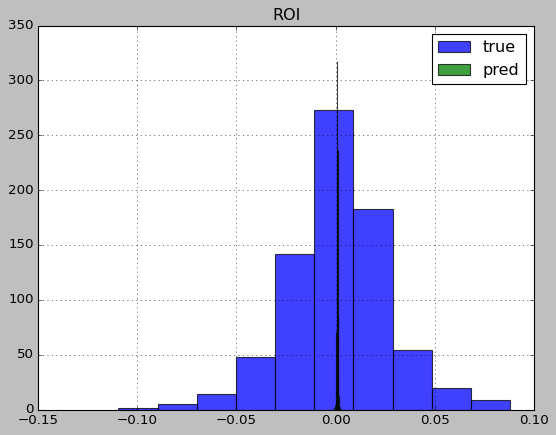

In [64]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Bayesian Ridge Regression


reference: https://scikit-learn.org/stable/modules/linear_model.html#orthogonal-matching-pursuit-omp

created by scikit_learn

In [65]:
from sklearn import linear_model

In [66]:
mdl = linear_model.BayesianRidge().fit(X_train, y_train)



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')

R2 Score: 1.0


In [68]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,0.002725
1,0.009496
2,-0.000081
3,-0.007707
4,-0.000413
...,...
744,-0.022292
745,-0.019064
746,0.054946
747,0.065071


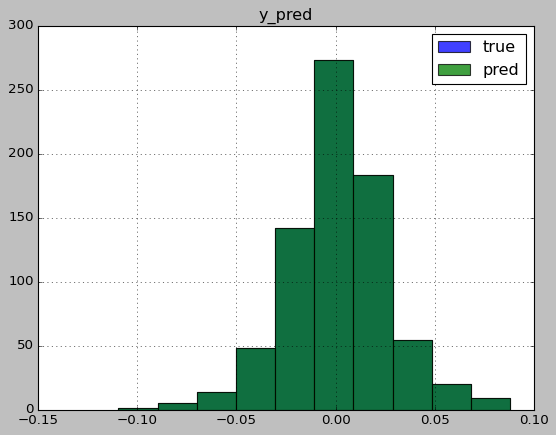

In [69]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()

## ElasticNet

reference: https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_and_elasticnet.html#sphx-glr-auto-examples-linear-model-plot-lasso-and-elasticnet-py

created by scikit_learn

In [70]:
from sklearn.linear_model import ElasticNet

In [71]:
enet = ElasticNet(alpha=0.75, l1_ratio=0.7)
mdl = ElasticNet(alpha=0.75, l1_ratio=0.7).fit(X_train, y_train)

In [72]:
mdl = ElasticNet().fit(X_train, y_train)

In [73]:
r2 = r2_score(y_test, mdl.predict(X_test))

print(f'R2 Score: {r2}')


R2 Score: -0.000691234479013092


In [74]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,0.000539
1,0.000539
2,0.000539
3,0.000539
4,0.000539
...,...
744,0.000539
745,0.000539
746,0.000539
747,0.000539


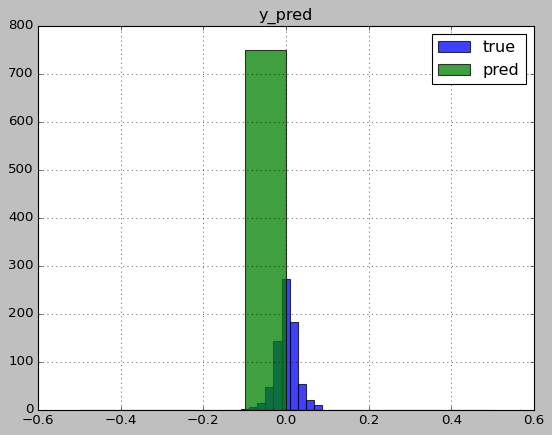

In [75]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()

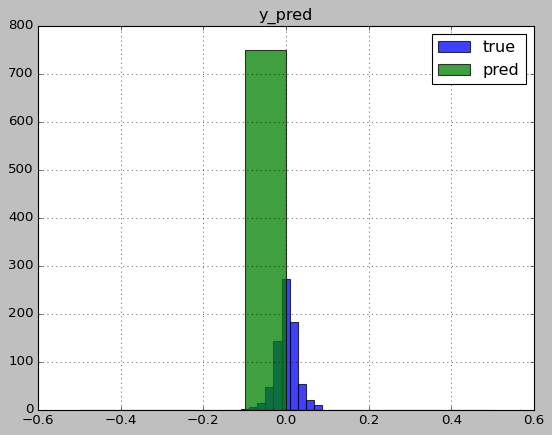

In [76]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()